In [ ]:
#Name:sanskruti ajay chandore
#Roll no.:09
#Subject:ET1
#Sec:C
#Date:29/09/2025

# To perform and analysis of Logistic Regression Algorithm

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np

# Data acquisition using Pandas 

In [88]:
import os

In [89]:
os.getcwd()

'C:\\Users\\USER\\OneDrive\\Desktop'

In [90]:
os.chdir('C:\\Users\\USER\\OneDrive\\Desktop')

In [91]:
data=pd.read_csv("heart.csv")

In [92]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [95]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
data.shape

(1025, 14)

In [97]:
data.size

14350

In [98]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [99]:
data.ndim

2

# Data preprocessing _ data cleaning _ missing value treatment

In [100]:
# check Missing Value by record 

data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [102]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Independent and Dependent Variables


In [103]:
x=data.drop("target", axis=1)
y=data["target"]

# Splitting of DataSet into train and Test

In [104]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log = LogisticRegression()
log.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_pred1 = log.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score 

In [109]:
accuracy_score (y_test,y_pred1)


0.7804878048780488

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [111]:
cm = confusion_matrix(y_test, y_pred1)

In [112]:
labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

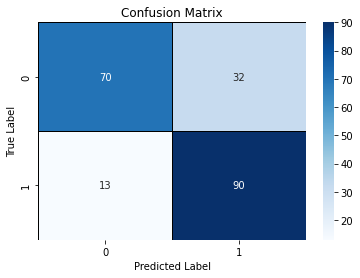

In [113]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


In [37]:
knn=KNeighborsClassifier()

In [38]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred2=knn.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred2)

In [41]:
accuracy

0.7317073170731707

# Support Vector Classifier / Machine (SVC/SVM)

In [42]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [43]:
y_pred3=svm.predict(x_test)

In [44]:
accuracy_score (y_test,y_pred3)

0.6829268292682927

# Decision Trees Algorithm

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier()

In [47]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred4=dt.predict(x_test)

In [49]:
accuracy_score (y_test,y_pred4)

0.9853658536585366

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
y_pred5=rf.predict(x_test)

In [54]:
accuracy_score (y_test,y_pred5)

0.9853658536585366

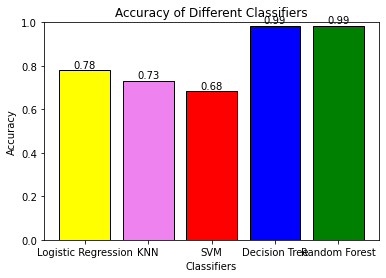

In [67]:
import matplotlib.pyplot as plt

# Data for the chart
classifiers = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [0.7804878048780488, 0.7317073170731707, 0.6829268292682927,0.9853658536585366,0.9853658536585366]
x=['yellow','violet','red','blue','green']
# Create the bar chart
plt.bar(classifiers, accuracy, color=x, edgecolor='black')

# Add labels and title
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # since accuracy values are between 0 and 1

# Display the value on top of each bar
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

# Show the chart
plt.show()


===== Logistic Regression =====

===== KNN =====

===== SVM =====

===== Decision Tree =====

===== Random Forest =====

Accuracy Comparison:

                 Model      Base   Bagging  Boosting
0  Logistic Regression  0.820000  0.820000  0.816667
1                  KNN  0.903333  0.896667       NaN
2                  SVM  0.930000  0.930000       NaN
3        Decision Tree  0.793333  0.896667  0.783333
4        Random Forest  0.883333  0.886667  0.893333


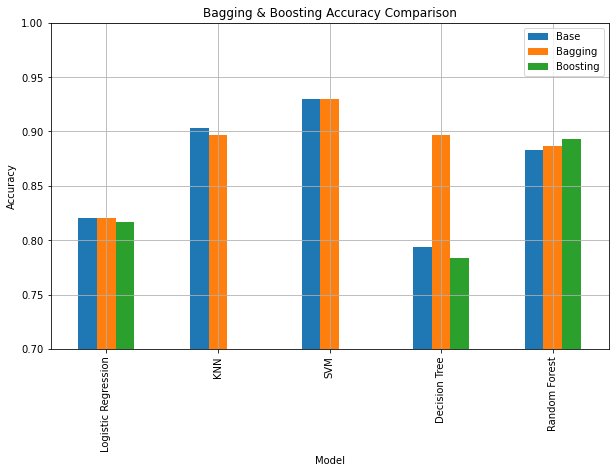

In [68]:
# ====================================================
# 🧠 MACHINE LEARNING ENSEMBLE METHODS
# Bagging and Boosting with LR, KNN, SVM, DT, RF
# ====================================================

# 📦 Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# ====================================================
# 🧩 Create Synthetic Dataset
# ====================================================
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ====================================================
# ⚙ Define Base Models
# ====================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# ====================================================
# 🧠 Train Base, Bagging, and Boosting Models
# ====================================================
results = []

for name, base_model in models.items():
    print(f"\n===== {name} =====")

    # ---------- Base Model ----------
    base_model.fit(X_train, y_train)
    base_pred = base_model.predict(X_test)
    base_acc = accuracy_score(y_test, base_pred)

    # ---------- Bagging ----------
    bagging_model = BaggingClassifier(
        base_estimator=base_model,
        n_estimators=30,
        random_state=42
    )
    bagging_model.fit(X_train, y_train)
    bag_pred = bagging_model.predict(X_test)
    bag_acc = accuracy_score(y_test, bag_pred)

    # ---------- Boosting ----------
    # Only apply to models that work well with boosting
    if name in ["Decision Tree", "Random Forest", "Logistic Regression"]:
        boosting_model = AdaBoostClassifier(
            base_estimator=base_model,
            n_estimators=30,
            learning_rate=0.5,
            random_state=42
        )
        boosting_model.fit(X_train, y_train)
        boost_pred = boosting_model.predict(X_test)
        boost_acc = accuracy_score(y_test, boost_pred)
    else:
        boost_acc = np.nan  # Not applicable

    # ---------- Store Results ----------
    results.append([name, base_acc, bag_acc, boost_acc])

# ====================================================
# 📊 Compare Accuracies
# ====================================================
results_df = pd.DataFrame(results, columns=["Model", "Base", "Bagging", "Boosting"])
print("\nAccuracy Comparison:\n")
print(results_df)

# ====================================================
# 📈 Plot Accuracy Comparison
# ====================================================
results_df.set_index("Model", inplace=True)
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Bagging & Boosting Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.show()